# Final Project-Nataly Valenzuela Mullen 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import (OrdinalEncoder, MinMaxScaler, StandardScaler, LabelEncoder)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from scipy.stats import mode
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data
scaled_df= pd.read_csv("scaled_df.csv")
scaled_df.drop(["Classification"],axis = 1, inplace=True)
categoricalCol=['Category', 'Character', 'Color']
scaled_df= pd.get_dummies(scaled_df, columns=categoricalCol, drop_first=True)
scaled_df.head(2)

,Change Price?,Buy It Now Price,Image Count,Hood,Lights,AMZSize,Sold Quantity,Category_Alcohol,Category_Comedy,Category_Costume,...,Color_blue,Color_green,Color_grey,Color_multicolor,Color_orange,Color_purple,Color_red,Color_turquoise,Color_white,Color_yellow
0,0,0.428571,6,0,0,5.0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.714286,6,0,0,3.0,44,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X=scaled_df.drop(['Sold Quantity'],axis = 1)
y=scaled_df['Sold Quantity']
labels=[f'cat {i}' for i in range(len(np.arange(0,y.max()+10,5)) -1)]
yCat=pd.cut(y, bins=np.arange(0,y.max()+10,5), labels=labels)

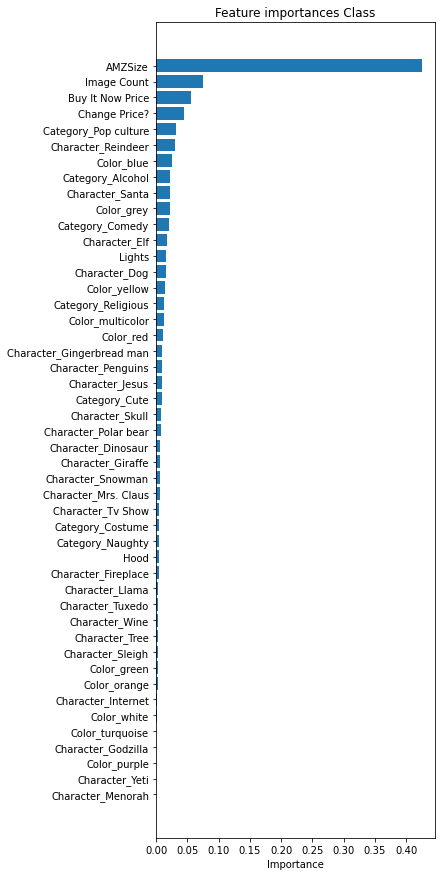

In [4]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,15))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances Class')
plt.draw()
plt.show()

In [5]:
X.columns

Index(['Change Price?', 'Buy It Now Price', 'Image Count', 'Hood', 'Lights',
       'AMZSize', 'Category_Alcohol', 'Category_Comedy', 'Category_Costume',
       'Category_Cute', 'Category_Naughty', 'Category_Pop culture',
       'Category_Religious', 'Character_Dinosaur', 'Character_Dog',
       'Character_Elf', 'Character_Fireplace', 'Character_Gingerbread man',
       'Character_Giraffe', 'Character_Godzilla', 'Character_Internet',
       'Character_Jesus', 'Character_Llama', 'Character_Menorah',
       'Character_Mrs. Claus', 'Character_Penguins', 'Character_Polar bear',
       'Character_Reindeer', 'Character_Santa', 'Character_Skull',
       'Character_Sleigh', 'Character_Snowman', 'Character_Tree',
       'Character_Tuxedo', 'Character_Tv Show', 'Character_Wine',
       'Character_Yeti', 'Color_blue', 'Color_green', 'Color_grey',
       'Color_multicolor', 'Color_orange', 'Color_purple', 'Color_red',
       'Color_turquoise', 'Color_white', 'Color_yellow'],
      dtype='object')

In [6]:
X=X[['AMZSize','Image Count', 'Buy It Now Price', 'Change Price?','Category_Pop culture', 
     'Color_blue','Category_Comedy', 'Lights', 'Character_Elf', 'Character_Dog',
      'Character_Reindeer','Color_grey','Character_Santa','Hood']]

In [7]:
# # # X.drop(X.iloc[:, 5:14], inplace = True, axis = 1) #category
# X.drop(X.iloc[:, 5:10], inplace = True, axis = 1) #category but not dropping pop culture
# X.drop(X.iloc[:, 6:21], inplace = True, axis = 1) #category-subcat but not dropping reindeer or santa
# X.drop(X.iloc[:, 8:16], inplace = True, axis = 1) #color not dropping blue
# X.drop(X.iloc[:, 9:14], inplace = True, axis = 1) #color not dropping red
# X.drop(X.iloc[:, 10:13], inplace = True, axis = 1) #color

# X.drop(X.iloc[:, 43:46], inplace = True, axis = 1) #color
# # X.drop(X.iloc[:, 24:26], inplace = True, axis = 1) #classification
# # # X.drop(X.iloc[:, 14:38], inplace = True, axis = 1) #character
# # X.drop(X.iloc[:, 4:5], inplace = True, axis = 1) #size
# X.drop(X.iloc[:, 36:46], inplace = True, axis = 1) #color

In [8]:
X.head(1)

,AMZSize,Image Count,Buy It Now Price,Change Price?,Category_Pop culture,Color_blue,Category_Comedy,Lights,Character_Elf,Character_Dog,Character_Reindeer,Color_grey,Character_Santa,Hood
0,5.0,6,0.428571,0,0,0,0,0,0,0,1,0,0,0


### Splitting the data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.30, random_state=42)

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (301, 14)
X_test shape:  (129, 14)
y_train shape:  (301,)
y_test shape:  (129,)


In [10]:
X_train, X_test, yCat_train, yCat_test = train_test_split(X, yCat.values, test_size=0.30, random_state=42)

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (301, 14)
X_test shape:  (129, 14)
y_train shape:  (301,)
y_test shape:  (129,)


### Models

#### Linear Regression

In [11]:
import statsmodels.api as sm

feature_matrix = sm.add_constant(X, prepend=False)
#Fit and summarize OLS model
model = sm.OLS(y, feature_matrix)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          Sold Quantity   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     11.96
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           2.08e-23
Time:                        19:38:27   Log-Likelihood:                -2117.9
No. Observations:                 430   AIC:                             4266.
Df Residuals:                     415   BIC:                             4327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
AMZSize                 -0.3663 

#### Linear Regression

In [12]:
lr=LinearRegression()
lr=lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.2855092164554113
0.21684658145525337
Training RMSE:  30.614316048256367
Test RMSE:  40.41340524577581


In [13]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

#### Lasso

In [14]:
lasso= Lasso()
lasso=lasso.fit(X_train, y_train)
y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.20992343173296502
0.144437392062702
Training RMSE:  32.192954572668576
Test RMSE:  42.24039002420508


In [15]:
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [16]:
maxDepth=clf.tree_.max_depth
param_grid = {'alpha': np.arange(0,0.1,0.001),
             'random_state':[42]}
lasso= Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
grid_search.best_score_

{'alpha': 0.099, 'random_state': 42}


0.210295969602524

In [17]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
99,0.004800,0.000746,0.002201,0.000400,0.099,42,"{'alpha': 0.099, 'random_state': 42}",0.194880,0.227773,0.211807,0.175531,0.241488,0.210296,0.023354,1
98,0.003801,0.000400,0.002600,0.000489,0.098,42,"{'alpha': 0.098, 'random_state': 42}",0.194795,0.227879,0.211796,0.175516,0.241439,0.210285,0.023372,2
97,0.004803,0.001163,0.002400,0.000485,0.097,42,"{'alpha': 0.097, 'random_state': 42}",0.194709,0.227986,0.211784,0.175502,0.241388,0.210274,0.023390,3
96,0.004802,0.000980,0.003199,0.000398,0.096,42,"{'alpha': 0.096, 'random_state': 42}",0.194623,0.228096,0.211772,0.175487,0.241338,0.210263,0.023409,4
95,0.004400,0.000489,0.002401,0.000490,0.095,42,"{'alpha': 0.095, 'random_state': 42}",0.194537,0.228202,0.211759,0.175472,0.241287,0.210251,0.023428,5
94,0.003600,0.000490,0.002400,0.000490,0.094,42,"{'alpha': 0.094, 'random_state': 42}",0.194450,0.228308,0.211746,0.175457,0.241235,0.210239,0.023446,6
93,0.004401,0.000801,0.003200,0.000748,0.093,42,"{'alpha': 0.093, 'random_state': 42}",0.194363,0.228429,0.211732,0.175441,0.241183,0.210230,0.023468,7
92,0.003999,0.000002,0.002401,0.000490,0.092,42,"{'alpha': 0.092, 'random_state': 42}",0.194275,0.228576,0.211718,0.175425,0.241131,0.210225,0.023493,8
91,0.004582,0.000814,0.002801,0.000750,0.091,42,"{'alpha': 0.091, 'random_state': 42}",0.194188,0.228723,0.211703,0.175408,0.241078,0.210220,0.023519,9
90,0.003400,0.000490,0.002400,0.000490,0.09,42,"{'alpha': 0.09, 'random_state': 42}",0.194099,0.228869,0.211687,0.175392,0.241025,0.210215,0.023545,10


In [18]:
lasso= Lasso(alpha=0)
lasso=lasso.fit(X_train, y_train)
y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.2855092164554113
0.21684658145525337
Training RMSE:  30.614316048256367
Test RMSE:  40.41340524577581


In [19]:
lasso= Lasso(alpha=0.099)
lasso=lasso.fit(X_train, y_train)
y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.2839507098864915
0.21684725410543482
Training RMSE:  30.647687103155658
Test RMSE:  40.413387890242674


In [20]:
# linear model is not a good fit for this data

#### Decision Tree

In [21]:
from sklearn import tree
clf=tree.DecisionTreeRegressor(random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.988338256360634
-0.042761938760697005
Training RMSE:  3.9111816875071184
Test RMSE:  46.633134408982215


In [22]:
clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [23]:
maxDepth=clf.tree_.max_depth
param_grid = {'max_depth':range(1, maxDepth+1),
              'max_features':[0.2,0.4,0.6,0.8], 
              'max_leaf_nodes':[20,30,40,50],
             'min_samples_leaf': [1,2,5,10]}
clf = tree.DecisionTreeRegressor()
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
grid_search.best_score_

{'max_depth': 16, 'max_features': 0.6, 'max_leaf_nodes': 20, 'min_samples_leaf': 1}


0.41483769073224136

In [24]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
992,0.003334,4.706415e-04,0.002333,4.711456e-04,16,0.6,20,1,"{'max_depth': 16, 'max_features': 0.6, 'max_le...",0.476004,0.477037,0.291472,0.414838,0.087233,1
1189,0.002999,1.655632e-06,0.002332,4.739557e-04,19,0.6,30,2,"{'max_depth': 19, 'max_features': 0.6, 'max_le...",0.341236,0.365355,0.374348,0.360313,0.013980,2
792,0.003668,4.709240e-04,0.002332,4.720467e-04,13,0.4,40,1,"{'max_depth': 13, 'max_features': 0.4, 'max_le...",0.397027,0.308825,0.363806,0.356553,0.036372,3
549,0.002666,4.714266e-04,0.002000,5.619580e-07,9,0.6,30,2,"{'max_depth': 9, 'max_features': 0.6, 'max_lea...",0.389755,0.332317,0.282516,0.334863,0.043817,4
976,0.003000,8.171187e-04,0.002668,4.702466e-04,16,0.4,20,1,"{'max_depth': 16, 'max_features': 0.4, 'max_le...",0.292185,0.551362,0.145131,0.329559,0.167935,5
1248,0.003001,4.495664e-07,0.002667,9.440894e-04,20,0.6,20,1,"{'max_depth': 20, 'max_features': 0.6, 'max_le...",0.279964,0.322502,0.380587,0.327684,0.041242,6
1238,0.002667,4.713723e-04,0.002333,4.732812e-04,20,0.4,30,5,"{'max_depth': 20, 'max_features': 0.4, 'max_le...",0.350268,0.407696,0.221107,0.326357,0.078029,7
784,0.004333,9.448200e-04,0.003334,4.700783e-04,13,0.4,20,1,"{'max_depth': 13, 'max_features': 0.4, 'max_le...",0.326138,0.256333,0.392644,0.325038,0.055654,8
1077,0.003334,4.717637e-04,0.002333,4.721571e-04,17,0.8,30,2,"{'max_depth': 17, 'max_features': 0.8, 'max_le...",0.445535,0.180842,0.346567,0.324315,0.109200,9
765,0.005332,4.726107e-04,0.002999,8.778064e-07,12,0.8,50,2,"{'max_depth': 12, 'max_features': 0.8, 'max_le...",0.405401,0.379508,0.187155,0.324021,0.097355,10


In [25]:
clf=tree.DecisionTreeRegressor(max_depth=4, max_features= 0.4, random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.3369948270796902
0.23617124313965165
Training RMSE:  29.490674402872564
Test RMSE:  39.91168140256353


In [26]:
#BEST
clf=tree.DecisionTreeRegressor(max_depth=6, max_features= 0.4, random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.4975822711038823
0.30047392294196773
Training RMSE:  25.671942055023905
Test RMSE:  38.19477677461694


In [27]:
clf=tree.DecisionTreeRegressor(max_depth=5, max_features= 0.8, random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.4725312455520928
0.19880998114977988
Training RMSE:  26.304170752839614
Test RMSE:  40.87613143114981


In [28]:
clf=tree.DecisionTreeRegressor(max_depth=7, max_features= 0.6, random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.6655770287478826
0.22437423120476285
Training RMSE:  20.944707341799354
Test RMSE:  40.2187099785595


In [29]:
# clf=tree.DecisionTreeRegressor(max_depth=4, max_features= 0.4, random_state=42, max_leaf_nodes= 30, min_samples_leaf= 1)
# clf=clf.fit(X_train, y_train)
# y_train_pred=clf.predict(X_train)
# y_test_pred=clf.predict(X_test)
# print(clf.score(X_train, y_train))
# print(clf.score(X_test, y_test))

# print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
# print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

In [30]:
maxDepth=clf.tree_.max_depth
param_grid = {'max_depth':range(1, maxDepth+1),
              'max_features':[0.2,0.4,0.6,0.8]}
clf = tree.DecisionTreeRegressor()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
grid_search.best_score_

{'max_depth': 7, 'max_features': 0.2}


0.34006579818474103

In [31]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,0.003801,0.000749,0.002799,3.996137e-04,7,0.2,"{'max_depth': 7, 'max_features': 0.2}",0.347989,0.211867,0.434222,0.360752,0.345500,0.340066,0.071862,1
26,0.003400,0.001357,0.002801,1.165822e-03,7,0.6,"{'max_depth': 7, 'max_features': 0.6}",0.463087,0.258284,0.555592,0.270407,0.117326,0.332939,0.156516,2
16,0.004201,0.000749,0.002600,8.006472e-04,5,0.2,"{'max_depth': 5, 'max_features': 0.2}",0.310638,0.228321,0.340055,0.320309,0.205227,0.280910,0.053717,3
14,0.002998,0.000002,0.002000,6.975526e-07,4,0.6,"{'max_depth': 4, 'max_features': 0.6}",0.311977,0.225664,0.208643,0.360957,0.213513,0.264151,0.061295,4
27,0.003600,0.000800,0.003201,9.802118e-04,7,0.8,"{'max_depth': 7, 'max_features': 0.8}",0.426099,0.061155,0.286070,0.302562,0.119452,0.239068,0.132047,5
21,0.003800,0.000400,0.003201,9.789871e-04,6,0.4,"{'max_depth': 6, 'max_features': 0.4}",0.265510,0.253221,0.331533,0.200917,0.097848,0.229806,0.077999,6
22,0.004802,0.000400,0.002599,4.898826e-04,6,0.6,"{'max_depth': 6, 'max_features': 0.6}",0.353987,0.026977,0.496411,0.126090,0.112985,0.223290,0.174259,7
10,0.002999,0.000002,0.002201,4.004723e-04,3,0.6,"{'max_depth': 3, 'max_features': 0.6}",0.312929,0.196294,0.238581,0.142216,0.218783,0.221761,0.055820,8
18,0.003600,0.000801,0.002800,7.490294e-04,5,0.6,"{'max_depth': 5, 'max_features': 0.6}",0.222927,0.391421,0.195432,0.116089,0.133050,0.211784,0.097998,9
15,0.003201,0.000402,0.003200,3.992340e-04,4,0.8,"{'max_depth': 4, 'max_features': 0.8}",0.301533,0.176460,0.257304,0.158035,0.067786,0.192224,0.081346,10


In [32]:
clf=tree.DecisionTreeRegressor(max_depth=7, max_features= 0.8, random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.6796303437501731
-0.028400212731035435
Training RMSE:  20.49990901094639
Test RMSE:  46.31088715790144


In [33]:
clf=tree.DecisionTreeRegressor(max_depth=3, max_features= 0.6, random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.31002359681237524
0.17664998042098567
Training RMSE:  30.08453927881351
Test RMSE:  41.43756927946151


#### Classifier

In [34]:
clf=tree.DecisionTreeClassifier(random_state=42)
clf=clf.fit(X_train, yCat_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, yCat_train))
print(clf.score(X_test, yCat_test))

0.9667774086378738
0.17829457364341086


In [35]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [36]:
maxDepth=clf.tree_.max_depth
param_grid = {'max_depth':range(1, maxDepth+1),
              'max_features':[0.2,0.4,0.6,0.8], 
              'max_leaf_nodes':[20,30,40,50],
             'min_samples_leaf': [1,2,5,10]}
clf = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, yCat_train)
print(grid_search.best_params_)
grid_search.best_score_

{'max_depth': 6, 'max_features': 0.6, 'max_leaf_nodes': 20, 'min_samples_leaf': 10}


0.31240437158469947

In [37]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
355,0.004002,8.983134e-04,0.003200,4.015974e-04,6,0.6,20,10,"{'max_depth': 6, 'max_features': 0.6, 'max_lea...",0.278689,0.316667,0.316667,0.333333,0.316667,0.312404,0.018051,1
663,0.003202,7.492865e-04,0.001799,3.992348e-04,11,0.4,30,10,"{'max_depth': 11, 'max_features': 0.4, 'max_le...",0.278689,0.266667,0.366667,0.333333,0.283333,0.305738,0.038037,2
783,0.003000,7.835234e-07,0.002000,1.072619e-06,13,0.2,50,10,"{'max_depth': 13, 'max_features': 0.2, 'max_le...",0.311475,0.300000,0.350000,0.283333,0.266667,0.302295,0.028264,3
218,0.002800,4.000917e-04,0.002000,8.476443e-07,4,0.4,40,5,"{'max_depth': 4, 'max_features': 0.4, 'max_lea...",0.344262,0.300000,0.300000,0.266667,0.300000,0.302186,0.024683,4
299,0.003200,3.992348e-04,0.002200,3.995420e-04,5,0.6,40,10,"{'max_depth': 5, 'max_features': 0.6, 'max_lea...",0.278689,0.316667,0.300000,0.316667,0.283333,0.299071,0.016020,5
658,0.004001,6.317379e-04,0.002399,4.901164e-04,11,0.4,20,5,"{'max_depth': 11, 'max_features': 0.4, 'max_le...",0.278689,0.300000,0.316667,0.316667,0.266667,0.295738,0.020149,6
571,0.005001,1.414516e-03,0.003601,4.911909e-04,9,0.8,40,10,"{'max_depth': 9, 'max_features': 0.8, 'max_lea...",0.295082,0.266667,0.316667,0.316667,0.283333,0.295683,0.019367,7
475,0.003399,4.897084e-04,0.002401,4.906616e-04,8,0.4,40,10,"{'max_depth': 8, 'max_features': 0.4, 'max_lea...",0.295082,0.300000,0.300000,0.283333,0.300000,0.295683,0.006462,8
133,0.003000,6.468134e-07,0.002000,7.776979e-07,3,0.2,30,2,"{'max_depth': 3, 'max_features': 0.2, 'max_lea...",0.295082,0.300000,0.316667,0.283333,0.283333,0.295683,0.012364,8
586,0.003200,3.986461e-04,0.002000,1.108069e-06,10,0.2,40,5,"{'max_depth': 10, 'max_features': 0.2, 'max_le...",0.245902,0.316667,0.333333,0.283333,0.283333,0.292514,0.030301,10


In [38]:
clf=tree.DecisionTreeClassifier(max_depth= 8, max_features= 0.2, random_state=42)
# clf=tree.DecisionTreeClassifier(max_depth= 8, max_leaf_nodes=30,max_features= 0.2,  min_samples_leaf= 2, random_state=42)
clf=clf.fit(X_train, yCat_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, yCat_train))
print(clf.score(X_test, yCat_test))

0.4983388704318937
0.24806201550387597


In [39]:
# clf=tree.DecisionTreeClassifier(max_depth= 10, max_features= 0.4, random_state=42)
clf=tree.DecisionTreeClassifier(max_depth= 8, max_leaf_nodes=40,max_features= 0.2,  min_samples_leaf= 5, random_state=42)
clf=clf.fit(X_train, yCat_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, yCat_train))
print(clf.score(X_test, yCat_test))

0.3488372093023256
0.26356589147286824


In [40]:
# clf=tree.DecisionTreeClassifier(max_depth= 10, max_features= 0.4, random_state=42)
clf=tree.DecisionTreeClassifier(max_depth= 10, max_leaf_nodes=30,max_features= 0.4,  min_samples_leaf= 10, random_state=42)
clf=clf.fit(X_train, yCat_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, yCat_train))
print(clf.score(X_test, yCat_test))

0.34551495016611294
0.2248062015503876


In [41]:
# clf=tree.DecisionTreeClassifier(max_depth= 4, max_leaf_nodes=50,max_features= 0.8,  min_samples_leaf= 5, random_state=42)
clf=tree.DecisionTreeClassifier(max_depth= 4,max_features= 0.8, random_state=42)
clf=clf.fit(X_train, yCat_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, yCat_train))
print(clf.score(X_test, yCat_test))

0.34551495016611294
0.24031007751937986


In [42]:
# the smaller max depth we don't need the others to not overfit

#### Random Forest

In [43]:
clf_rf = RandomForestRegressor(random_state=42)
clf_rf.fit(X_train, y_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, rf_y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,rf_y_test_pred)))

0.9184678135274456
0.365007466476005
Training RMSE:  10.341672736701419
Test RMSE:  36.390358253967044


In [44]:
#these are the best for decision trees so I used these
clf_rf = RandomForestRegressor(max_depth=6, max_features= 0.4, random_state=42)
clf_rf.fit(X_train, y_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, rf_y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,rf_y_test_pred)))

0.6482448441969404
0.3144738321195727
Training RMSE:  21.48060364588158
Test RMSE:  37.81064103882696


In [45]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 6,
 'max_features': 0.4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

##### Tuning

In [46]:
param_grid = {'max_depth':np.arange(4, 10),
              'max_features':[0.2,0.4,0.6,0.8],
              'n_estimators': [10,50,100,200,300,500,1000]}
grid_search = GridSearchCV(clf_rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

RandomForestRegressor(max_depth=9, max_features=0.4, n_estimators=200,
                      random_state=42)


0.4835204395671754

In [47]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(30)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
150,0.374330,0.031983,0.022601,0.003877,9,0.4,200,"{'max_depth': 9, 'max_features': 0.4, 'n_estim...",0.475502,0.279282,0.623909,0.527195,0.511715,0.483520,0.113304,1
148,0.101607,0.008429,0.007401,0.000490,9,0.4,50,"{'max_depth': 9, 'max_features': 0.4, 'n_estim...",0.469091,0.294694,0.617151,0.510980,0.516632,0.481710,0.105408,2
151,0.569442,0.086988,0.030403,0.006087,9,0.4,300,"{'max_depth': 9, 'max_features': 0.4, 'n_estim...",0.477218,0.273517,0.622115,0.528381,0.497338,0.479714,0.114438,3
153,1.993651,0.121234,0.084606,0.009521,9,0.4,1000,"{'max_depth': 9, 'max_features': 0.4, 'n_estim...",0.476136,0.265226,0.629216,0.526948,0.497980,0.479101,0.119106,4
152,1.172107,0.155234,0.062004,0.010409,9,0.4,500,"{'max_depth': 9, 'max_features': 0.4, 'n_estim...",0.475997,0.267316,0.625207,0.532145,0.491269,0.478387,0.117617,5
149,0.198015,0.018582,0.011800,0.001167,9,0.4,100,"{'max_depth': 9, 'max_features': 0.4, 'n_estim...",0.469742,0.274660,0.619878,0.501405,0.507535,0.474644,0.112168,6
158,0.555244,0.074858,0.027202,0.004166,9,0.6,300,"{'max_depth': 9, 'max_features': 0.6, 'n_estim...",0.508531,0.230947,0.638174,0.509091,0.475705,0.472490,0.132999,7
159,0.899068,0.051954,0.048403,0.004318,9,0.6,500,"{'max_depth': 9, 'max_features': 0.6, 'n_estim...",0.504959,0.235261,0.639550,0.507207,0.469663,0.471328,0.131489,8
160,1.926006,0.357234,0.088607,0.019948,9,0.6,1000,"{'max_depth': 9, 'max_features': 0.6, 'n_estim...",0.503279,0.238648,0.638251,0.504916,0.469685,0.470956,0.129734,9
157,0.427733,0.061039,0.022402,0.003720,9,0.6,200,"{'max_depth': 9, 'max_features': 0.6, 'n_estim...",0.506260,0.228603,0.640117,0.501747,0.473290,0.470004,0.133825,10


In [48]:
clf_rf = RandomForestRegressor(max_depth=9, max_features= 0.4, n_estimators=200,random_state=42)
clf_rf.fit(X_train, y_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)

print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, rf_y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,rf_y_test_pred)))

0.8362808411435276
0.394063180290253
Training RMSE:  14.654668478380334
Test RMSE:  35.54804271499406


In [49]:
clf_rf = RandomForestRegressor(max_depth=9, max_features= 0.4, n_estimators=1000,random_state=42)
clf_rf.fit(X_train, y_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)

print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, rf_y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,rf_y_test_pred)))

0.8403700499832222
0.39657321604835716
Training RMSE:  14.4704965703458
Test RMSE:  35.47433911193609


In [50]:
clf_rf = RandomForestRegressor(max_depth=9, max_features= 0.6, n_estimators=1000,random_state=42)
clf_rf.fit(X_train, y_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)

print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, rf_y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,rf_y_test_pred)))

0.8565318598934387
0.3836118051699863
Training RMSE:  13.718416365779932
Test RMSE:  35.85330354366148


In [51]:
clf_rf = RandomForestRegressor(max_depth=9, max_features= 0.4, n_estimators=2000,random_state=42)
clf_rf.fit(X_train, y_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)

print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, rf_y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,rf_y_test_pred)))

0.8412955158322049
0.39674754684700253
Training RMSE:  14.428488735800183
Test RMSE:  35.469214449956574


In [52]:
#BEST
clf_rf = RandomForestRegressor(max_depth=9, max_features= 0.4, n_estimators=5000,random_state=42)
clf_rf.fit(X_train, y_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)

print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, rf_y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,rf_y_test_pred)))
# in order to address the overfit I would have to drastially underfit it

0.8410060180364674
0.3978976564111224
Training RMSE:  14.441642467989873
Test RMSE:  35.435387032881124


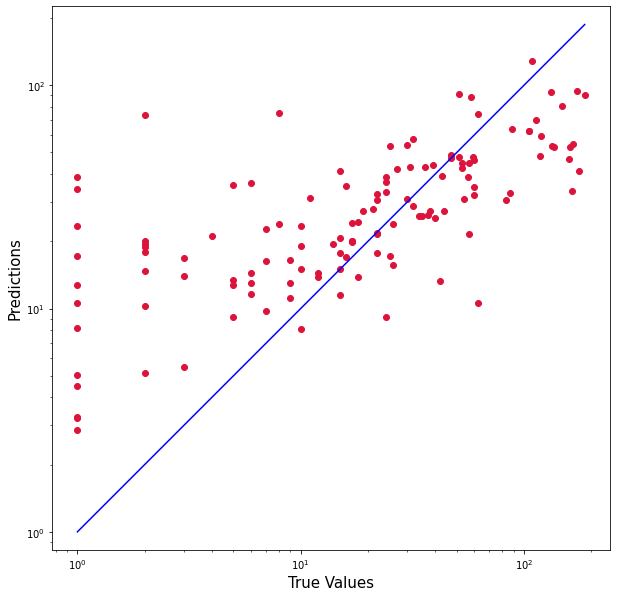

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, rf_y_test_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(rf_y_test_pred), max(y_test))
p2 = min(min(rf_y_test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [54]:
clf_rf = RandomForestRegressor(max_depth=7, max_features= 0.4, n_estimators=5000,random_state=42)
clf_rf.fit(X_train, y_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)

print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, rf_y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,rf_y_test_pred)))

0.7335340234819243
0.3639444181972208
Training RMSE:  18.695932353776428
Test RMSE:  36.420806273884516


In [55]:
clf_rf = RandomForestRegressor(max_depth=6, max_features= 0.4, n_estimators=5000,random_state=42)
clf_rf.fit(X_train, y_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)

print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, rf_y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,rf_y_test_pred)))

0.6615669584107557
0.3355258613829575
Training RMSE:  21.069907275130454
Test RMSE:  37.2255448653223


In [56]:
clf_rf = RandomForestRegressor(max_depth=6, max_features= 0.6, n_estimators=5000,random_state=42)
clf_rf.fit(X_train, y_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)

print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, rf_y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,rf_y_test_pred)))

0.6973719993826071
0.332728757902369
Training RMSE:  19.924195759262194
Test RMSE:  37.303813038549876


In [57]:
#Addressing overfit but the cost in RMSE we get a high difference 
clf_rf = RandomForestRegressor(max_depth=2, max_features= 0.4, n_estimators=5000,random_state=42)
clf_rf.fit(X_train, y_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)

print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, rf_y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,rf_y_test_pred)))

0.2671997181108273
0.15008816634375755
Training RMSE:  31.00409505238349
Test RMSE:  42.10066539298613


#### Classifier

In [58]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, yCat_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, yCat_train))
print(clf_rf.score(X_test, yCat_test))


0.9667774086378738
0.2248062015503876


In [59]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [60]:
param_grid = {'max_depth':np.arange(4, 10),
              'max_features':[0.2,0.4,0.6,0.8],
              'n_estimators': [10,50,100,200,300,500,1000]}
grid_search = GridSearchCV(clf_rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

RandomForestClassifier(max_depth=5, max_features=0.6, random_state=42)


0.12967213114754098

In [61]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(30)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
44,0.205015,0.036257,0.016602,0.003383,5,0.6,100,"{'max_depth': 5, 'max_features': 0.6, 'n_estim...",0.098361,0.116667,0.133333,0.133333,0.166667,0.129672,0.022561,1
41,2.020618,0.200357,0.158614,0.036150,5,0.4,1000,"{'max_depth': 5, 'max_features': 0.4, 'n_estim...",0.098361,0.133333,0.116667,0.133333,0.150000,0.126339,0.017516,2
80,0.479837,0.059238,0.032801,0.004955,6,0.8,200,"{'max_depth': 6, 'max_features': 0.8, 'n_estim...",0.098361,0.116667,0.133333,0.116667,0.150000,0.123005,0.017453,3
38,0.430734,0.014608,0.029803,0.002401,5,0.4,200,"{'max_depth': 5, 'max_features': 0.4, 'n_estim...",0.098361,0.133333,0.100000,0.133333,0.150000,0.123005,0.020389,3
46,0.616246,0.061129,0.042404,0.006344,5,0.6,300,"{'max_depth': 5, 'max_features': 0.6, 'n_estim...",0.098361,0.116667,0.100000,0.150000,0.150000,0.123005,0.022953,3
45,0.425442,0.045274,0.032002,0.003522,5,0.6,200,"{'max_depth': 5, 'max_features': 0.6, 'n_estim...",0.098361,0.116667,0.116667,0.133333,0.150000,0.123005,0.017453,3
26,1.106483,0.033172,0.073804,0.007731,4,0.8,500,"{'max_depth': 4, 'max_features': 0.8, 'n_estim...",0.098361,0.116667,0.116667,0.116667,0.150000,0.119672,0.016740,7
27,2.392182,0.150349,0.144209,0.013334,4,0.8,1000,"{'max_depth': 4, 'max_features': 0.8, 'n_estim...",0.098361,0.116667,0.116667,0.116667,0.150000,0.119672,0.016740,7
20,2.225192,0.350173,0.143410,0.007474,4,0.6,1000,"{'max_depth': 4, 'max_features': 0.6, 'n_estim...",0.098361,0.116667,0.116667,0.116667,0.150000,0.119672,0.016740,7
19,0.968874,0.067404,0.070406,0.005748,4,0.6,500,"{'max_depth': 4, 'max_features': 0.6, 'n_estim...",0.098361,0.116667,0.116667,0.116667,0.150000,0.119672,0.016740,7


In [62]:
clf_rf = RandomForestClassifier(max_depth=5, max_features=0.6, n_estimators=100,random_state=42)
clf_rf.fit(X_train, yCat_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, yCat_train))
print(clf_rf.score(X_test, yCat_test))


0.5016611295681063
0.24806201550387597


In [63]:
clf_rf = RandomForestClassifier(max_depth=5, max_features=0.4, n_estimators=1000,random_state=42)
clf_rf.fit(X_train, yCat_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, yCat_train))
print(clf_rf.score(X_test, yCat_test))

0.5116279069767442
0.24031007751937986


In [64]:
clf_rf = RandomForestClassifier(max_depth=6, max_features=0.8, n_estimators=200,random_state=42)
clf_rf.fit(X_train, yCat_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, yCat_train))
print(clf_rf.score(X_test, yCat_test))

0.6378737541528239
0.26356589147286824


In [65]:
#BEST
clf_rf = RandomForestClassifier(max_depth=4, max_features=0.8, n_estimators=500,random_state=42)
clf_rf.fit(X_train, yCat_train)
rf_y_train_pred=clf_rf.predict(X_train)
rf_y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, yCat_train))
print(clf_rf.score(X_test, yCat_test))

0.40863787375415284
0.24031007751937986


#### KNN

In [66]:
knn=KNeighborsRegressor()
knn.fit(X_train, y_train)
y_train_prediction=knn.predict(X_train)
y_prediction=knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train,y_train_prediction)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

0.41797198649515654
0.27982134324856556
Training RMSE:  27.63110097089487
Test RMSE:  38.75450061385719


In [67]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

##### Tuning

In [68]:
param_grid= {'n_neighbors': np.arange(1,40),
            'p':[1,2]}
grid_search= GridSearchCV(knn, param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

KNeighborsRegressor(n_neighbors=10, p=1)


0.22819335079381073

In [69]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(30)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
18,0.002667,4.717640e-04,0.002667,4.711459e-04,10,1,"{'n_neighbors': 10, 'p': 1}",0.229380,0.246877,0.208324,0.228193,0.015761,1
16,0.003000,8.778064e-07,0.002000,5.150430e-07,9,1,"{'n_neighbors': 9, 'p': 1}",0.244063,0.205266,0.203059,0.217463,0.018831,2
20,0.002667,4.710899e-04,0.002667,4.713704e-04,11,1,"{'n_neighbors': 11, 'p': 1}",0.207859,0.220736,0.190853,0.206483,0.012238,3
22,0.002333,4.711457e-04,0.002667,4.713171e-04,12,1,"{'n_neighbors': 12, 'p': 1}",0.218679,0.181953,0.204883,0.201838,0.015147,4
24,0.003001,8.485379e-07,0.002666,4.709228e-04,13,1,"{'n_neighbors': 13, 'p': 1}",0.212236,0.182456,0.208280,0.200991,0.013205,5
12,0.003004,6.072267e-06,0.002997,5.886359e-06,7,1,"{'n_neighbors': 7, 'p': 1}",0.260543,0.164098,0.174650,0.199764,0.043193,6
14,0.002667,4.717638e-04,0.002334,4.710899e-04,8,1,"{'n_neighbors': 8, 'p': 1}",0.242088,0.179581,0.168821,0.196830,0.032302,7
34,0.002334,4.709770e-04,0.002667,4.703588e-04,18,1,"{'n_neighbors': 18, 'p': 1}",0.208390,0.150668,0.220634,0.193231,0.030509,8
32,0.002333,4.718206e-04,0.002667,4.715952e-04,17,1,"{'n_neighbors': 17, 'p': 1}",0.213273,0.151596,0.209493,0.191454,0.028226,9
10,0.003665,4.722138e-04,0.003334,4.713714e-04,6,1,"{'n_neighbors': 6, 'p': 1}",0.257719,0.129691,0.175037,0.187483,0.053003,10


In [70]:
knn=KNeighborsRegressor(n_neighbors=10, p=1)
knn.fit(X_train, y_train)
y_train_prediction=knn.predict(X_train)
y_prediction=knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train,y_train_prediction)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

0.39181242496082125
0.17253887513811672
Training RMSE:  28.245223628204982
Test RMSE:  41.54089234036877


In [71]:
knn=KNeighborsRegressor(n_neighbors=7, p=1)
knn.fit(X_train, y_train)
y_train_prediction=knn.predict(X_train)
y_prediction=knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train,y_train_prediction)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

0.4460925944234674
0.22309733479197058
Training RMSE:  26.955341083157336
Test RMSE:  40.25180197326084


In [72]:
#BEST
knn=KNeighborsRegressor(n_neighbors=5, p=1)
knn.fit(X_train, y_train)
y_train_prediction=knn.predict(X_train)
y_prediction=knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train,y_train_prediction)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

0.4510330360444692
0.3133711503417126
Training RMSE:  26.83486104756014
Test RMSE:  37.84103838488727


In [73]:
knn=KNeighborsRegressor(n_neighbors=8, p=2)
knn.fit(X_train, y_train)
y_train_prediction=knn.predict(X_train)
y_prediction=knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))


print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train,y_train_prediction)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

0.37363918074297675
0.17388123067711403
Training RMSE:  28.664115000944566
Test RMSE:  41.507183638554075


#### Classifier

In [74]:
knn=KNeighborsClassifier()
knn.fit(X_train, yCat_train)
y_train_prediction=knn.predict(X_train)
y_prediction=knn.predict(X_test)
print(knn.score(X_train, yCat_train))
print(knn.score(X_test, yCat_test))


0.43853820598006643
0.20930232558139536


In [75]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

##### Tuning

In [76]:
param_grid= {'n_neighbors': np.arange(1,40),
            'p':[1,2]}
grid_search= GridSearchCV(knn, param_grid, cv=3)
grid_search.fit(X_train, yCat_train)
print(grid_search.best_estimator_)
grid_search.best_score_

KNeighborsClassifier(n_neighbors=31)


0.30570957095709567

In [77]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(30)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
61,0.003667,4.715966e-04,0.007333,4.702466e-04,31,2,"{'n_neighbors': 31, 'p': 2}",0.287129,0.36,0.27,0.305710,0.039021,1
59,0.002661,4.672009e-04,0.007334,1.246746e-03,30,2,"{'n_neighbors': 30, 'p': 2}",0.277228,0.36,0.27,0.302409,0.040830,2
66,0.003000,7.867412e-07,0.006334,4.709770e-04,34,1,"{'n_neighbors': 34, 'p': 1}",0.297030,0.33,0.28,0.302343,0.020755,3
62,0.003333,4.710894e-04,0.007667,9.429093e-04,32,1,"{'n_neighbors': 32, 'p': 1}",0.306931,0.32,0.28,0.302310,0.016654,4
63,0.003000,8.167294e-04,0.007334,4.710332e-04,32,2,"{'n_neighbors': 32, 'p': 2}",0.297030,0.33,0.27,0.299010,0.024535,5
60,0.004000,8.178001e-04,0.007000,8.169242e-04,31,1,"{'n_neighbors': 31, 'p': 1}",0.306931,0.32,0.27,0.298977,0.021173,6
70,0.003667,1.247724e-03,0.008000,2.160973e-03,36,1,"{'n_neighbors': 36, 'p': 1}",0.287129,0.32,0.28,0.295710,0.017421,7
68,0.003000,6.743496e-07,0.007001,8.104673e-07,35,1,"{'n_neighbors': 35, 'p': 1}",0.287129,0.32,0.28,0.295710,0.017421,7
72,0.003000,1.140650e-06,0.006001,3.371748e-07,37,1,"{'n_neighbors': 37, 'p': 1}",0.287129,0.32,0.28,0.295710,0.017421,7
64,0.003668,9.422915e-04,0.007333,1.247618e-03,33,1,"{'n_neighbors': 33, 'p': 1}",0.297030,0.31,0.28,0.295677,0.012285,10


In [78]:
#BEST
knn=KNeighborsClassifier(n_neighbors=31, p=2)
knn.fit(X_train, yCat_train)
y_train_prediction=knn.predict(X_train)
y_prediction=knn.predict(X_test)
print(knn.score(X_train, yCat_train))
print(knn.score(X_test, yCat_test))

0.3089700996677741
0.20930232558139536


In [79]:
knn=KNeighborsClassifier(n_neighbors=34, p=2)
knn.fit(X_train, yCat_train)
y_train_prediction=knn.predict(X_train)
y_prediction=knn.predict(X_test)
print(knn.score(X_train, yCat_train))
print(knn.score(X_test, yCat_test))

0.30564784053156147
0.20930232558139536


In [80]:
knn=KNeighborsClassifier(n_neighbors=29, p=2)
knn.fit(X_train, yCat_train)
y_train_prediction=knn.predict(X_train)
y_prediction=knn.predict(X_test)
print(knn.score(X_train, yCat_train))
print(knn.score(X_test, yCat_test))

0.31561461794019935
0.20930232558139536


In [81]:
knn=KNeighborsClassifier(n_neighbors=10, p=1)
knn.fit(X_train, yCat_train)
y_train_prediction=knn.predict(X_train)
y_prediction=knn.predict(X_test)
print(knn.score(X_train, yCat_train))
print(knn.score(X_test, yCat_test))

0.39867109634551495
0.1937984496124031
